# Минимальная охватывающая окружность (вероятностный алгоритм)

В этом билете мы рассмотрим задачу о нахождении минимальной охватывающей окружности множества(smallest enclosing disc). Это задача, в которой необходимо по заданному набору точек найти окружность минимального радиуса, которая содержит все точки множества.

Давайте поймем несколько начальных аспектов:

1) Если у нас всего одна точка, то минимальная окружность определяется единственным образом. Она будет являться точкой.

<img src="q.png" style="display: inline"/>

2) Если у нас 2 точки на границе нашей окружности, то окружность лежит на них как на диаметре. Если это не так, то мы сможем ее уменьшить(стянуть на этих точках), пока не коснемся еще одной точки или же не сможем уменьшать ее, тогда она ляжет на них как на диаметре.

<img src="w.png" style="display: inline"/>  <img src="Desktop/a.png" style="display: inline"/>

3) Если у нас хотя бы три точки на границе, то окружность восстанавливается единственным образом и она минимальна (т.к. у треугольника описанная окружность единственна).

<img src="z.png" style="display: inline"/>

**Лемма 1.** Пусть $P$ – множество точек на плоскости, $R$ – тоже (возможно, пустое) Обозначим как $md(P,R)$ наименьшую окружность, охватывающую $P$ и имеющую все точки $R$ на границе. Пусть $p ∈ P$. Тогда если $md(P, R)$ существует, то он единственен.  

*Доказательство.* Если $|R| > 2$, то это очевидно невозможно – потому что по трем точкам окружность строится единственным образом.  
Пусть тогда $|R| \leqslant  2$ и существуют две минимальные окружности $D_0$ и $D_1$ с радиусом $r$ и центрами $x_0$ и $x_1$ соответственно.Тогда $P⊂D_0∩D_1$, $q_0$ и $q_1$ – точки пересечения $D_0$ и $D_1$, и $R⊂${$q_0,q_1$}. Но если мы построим окружность с центром точно посередине $q_0$ и $q_1$, она будет включать в себя $D_0∩D_1$ и на ее границе будет лежать $R$. По построению ее радиус будет меньше, чем $r$. Значит, $D_0$ и $D_1$ не являются минимальными охватывающими окружностями.

<img src="x.png" style="display: inline"/>

**Лемма 2.** Пусть $P$ – множество точек на плоскости, $R$ – тоже (возможно, пустое) Обозначим как $md(P,R)$ наименьшую окружность, охватывающую $P$ и имеющую все точки $R$ на границе. Пусть $p ∈ P$. Тогда если $p∈md(P\setminus${$p$}$,R)$, то $md(P,R)=md(P\setminus${$p$}$,R)$.  

*Доказательство.* Для множества $P\setminus \{p\}$ справедливо, что для него минимальный диск по определению - это $md(P \setminus \{p\}, R)$, но так как $p$ лежит внутри него, то он и является корректным диском для множества $P$. Но если бы в $P$ существовал еще меньший диск, то он бы существовал бы и для $P \setminus \{p\}$. Значит эти диски равны(в силу единственности) и $md(P, R) = md(P \setminus \{p\}, R)$.

**Лемма 3.** Пусть $P$ – множество точек на плоскости, $R$ – тоже (возможно, пустое) Обозначим как $md(P,R)$ наименьшую окружность, охватывающую $P$ и имеющую все точки $R$ на границе. Пусть $p ∈ P$. Тогда если $p\notin md(P\setminus${$p$}$,R)$,то $md(P,R)=md(P\setminus${$p$}$,R∪${$p$}$)$.

*Доказательство.* Пусть $D_0 = md(P \setminus \{p\}, R)$ и $D_1 = md(P, R)$. Рассмотрим семейство окружности $D(\lambda)$, $0\leqslant\lambda\leqslant1$. Зададим это семейство с помощью окружностей $D_0$ и $D_1$. При этом центры этих окружностей лежат на отрезке, соединяющем центры $D_0$ и $D_1$, и их координаты находятся по формуле $D_0*(1-\lambda)+D_1$. При этом радиус каждой из этих окружностей $r=r_0*(1-\lambda)+r_1$. Заметим, что $p \notin D_0$, но $p \in D_1$. Значит найдется такое $\lambda$, что точка $p$ лежит на границе окружности $D(\lambda)$. Но в таком случае так как эта окружность удовлетворяет условиям леммы и к тому же обладает меньшим или равным радиусом, чем $D_1$ (которая в свою очередь является минимальной охватывающей окружностью), то $\lambda = 1$. Это означает, что $D(\lambda) = D_1$, то точка $p$ лежит на границе $D_1$, то $md(P, R) = md(P \setminus \{p\}, R \cup {p})$.
￼￼

<img src="c.png" style="display: inline"/>

## Алгоритм

Для начала заведем массив точек.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
points = np.random.rand(6, 2)#массив точек
points

array([[ 0.54841547,  0.15620259],
       [ 0.6658813 ,  0.21721384],
       [ 0.06887253,  0.68537762],
       [ 0.98026974,  0.42550442],
       [ 0.38563324,  0.7877922 ],
       [ 0.40503513,  0.29290037]])

Рассмотрим метод min_circle0, который будет принимать на вход множество точек $P$, а возвращать будет искомую охватывающую окружность. Он по одной добавляет точки в текущую охватывающую окружность. Если на каком-то шаге $i$ алгоритма текущая точка $p$ оказалась вне текущей минимальной окружности $p\notin md(P_i)$, где $P_i$ - множество точек добавленных до $i$-го шага, а $R$ - множество точек на границе окружности, то утверждается, что она лежит на границе новой окружности, которая будет содержать в себе ее и все предыдущие точки.

Вызовем метод min_circle1, который будет принимать на вход множество точек $P$ и точку $r1$, а возвращать будет охватывающую окружность для множества $P$ содержащую $r1$ на границе. Он так же по одной добавляет точки в текущую окружнось. Если на каком-то шаге $j$ алгоритма текущая точка $p$ оказалась вне текущей минимальной окружности $p\notin md(P_j,r1)$ то в ответе для ранее добавленных точек вместе с $p$, $p$ будет лежать на границе вместе с $r1$.

Вызовем метод min_circle2, который будет принимать на вход множество точек $P$ и пару точек $r1$ и $r2$. Далее аналогично методу min_circle1 добавляются точки по одной, и если на каком-то шаге точка $p$ не окажется внутри окружности, это будет означать, что она лежит на границе вместе с $r1$ и $r2$, а значит окружность должна быть перестроена уже однозначным образом.

Так как все из описаных методов делают по сути одно и то же, принимают множество точек и, возможно, несколько точек для которых было доказано, что они должны лежать на границе. И отличаются только созданием начальной окружности в зависимости от количества точек на границе. Так что можно объеденить все методы в один рекурсивный, в котором глубина рекурсии будет соответствовать номеру алгоритма. 

Рассмотрим метод min_circle0, который будет принимать на вход множество точек $P$, а возвращать будет искомую охватывающую окружность. Он генерирует случайную перестановку из точек, которые поступили на вход и в получившимся порядке по одной добавляет их в текущую охватывающую окружность. Если на каком-то шаге $i$ алгоритма текущая точка $p$ оказалась вне текущей минимальной окружности $p\notin md(P_i,R)$, где $P_i$ - множество точек добавленных до $i$-го шага, а $R$ - множество точек на границе окружности, то утверждается, что она лежит на границе новой окружности, которая будет содержать в себе ее и все предыдущие точки. Перейдем на первый уровень и запустим метод min_circle1 уже с новыми данными $md(P_i,R\cup {p})$. Если на каком-то шаге алгоритма $j$ текущая точка $s$ оказалась вне текущей минимальной окружности $s\notin md(P_j,R\cup {p})$, то утверждается, что она лежит на границе новой окружности, которая будет содержать в себе ее и все предыдущие точки. Опустимся на второй уровень и запустим метод min_circle2 уже с новыми данными $md(P_j,R\cup {p} \cup {s})$. При построении новой окружности мы уже точно знаем, что две точки лежат на ней. Воспользуясь вторым аспектом, мы строим окружность $md(P_j,R\cup {p} \cup {s})$. И возвращаемся на уровень выше.

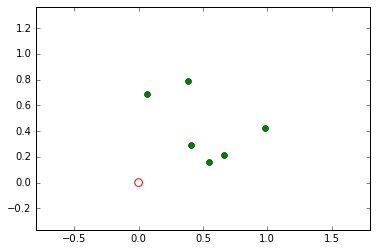

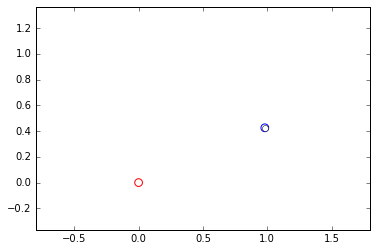

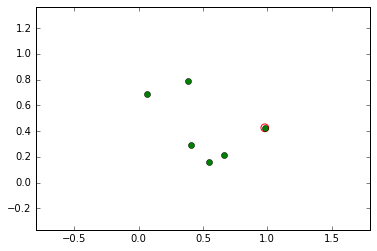

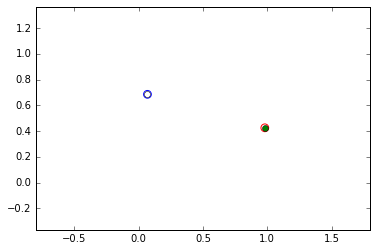

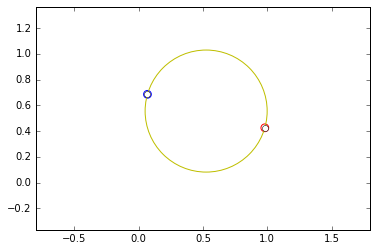

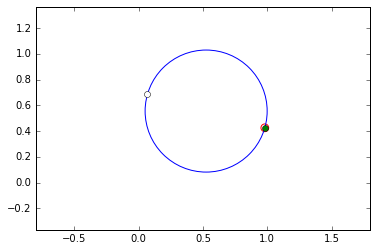

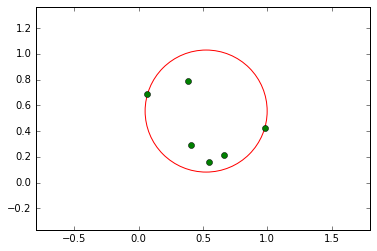

In [10]:
import random
def min_circle(pts, on_border, draw_c):#параметр draw_c нужен только для рисования
        if (len(on_border) == 3):
            return circle(on_border)
        
        cur = circle(on_border) #текущая окружность
        
        draw(np.copy(pts), np.copy(on_border), list(draw_c) + list([cur]))
        
        random.shuffle(pts)
        
        for i in range(0, len(pts)):
            if (not cur.inside(pts[i])):
                cur = min_circle(list(pts[0:i]), list(on_border) + list([pts[i]]), list(draw_c) + list([cur]))
                draw(np.copy(pts), np.copy(on_border), list(draw_c) + list([cur]))
        return cur
answer = min_circle(list(points), [], [])    

Если точек на границе >2, то мы ищем описанную окружность треугольника. 
Центром описанной около треугольника окружности является точка, в которой пересекаются все серединные перпендикуляры, проведённые к сторонам треугольника. Для начала из уравнения прямой $Ax+By+C=0$ мы выводим два серединных перпендикуляра. Далее составляем матрицу 

$\begin{vmatrix}a_1*x & b_1*y &| c_1 \\ a_2*x & b_2*y &| c_2 \end{vmatrix}$

И по методу Крамера находим центр описанной окружности.
<img src="v.png" style="display: inline"/>

In [7]:
import math

def dist(a, b):#квадрат расстояния
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)

class circle:
    #храним квадрат радиуса
    def __init__(self, points):
        if (len(points) == 0):#если точек на границе 0
            self.center = [0,0]
            self.radi = 0
        elif (len(points) == 1):#если точек на границе 1, то окружность это точка
            self.center = points[0]
            self.radi = 0
        elif (len(points) == 2):#если точек на границе 2, мы ищем описанную окружность на диаметре
            self.center = [(points[0][0] + points[1][0]) * 0.5, (points[0][1] + points[1][1]) * 0.5]
            self.radi = dist(points[0], points[1]) * 0.25;
        else:#если точек на границе >2, мы ищем описанную окружность треугольника 
            xp = (points[0][0] + points[1][0]) * 0.5;
            yp = (points[0][1] + points[1][1]) * 0.5;
            a1 = points[0][0] - points[1][0];
            b1 = points[0][1] - points[1][1];
            c1 = -xp * a1 - yp * b1;

            xp = (points[0][0] + points[2][0]) * 0.5;
            yp = (points[0][1] + points[2][1]) * 0.5;
            a2 = points[0][0] - points[2][0];
            b2 = points[0][1] - points[2][1];
            c2 = -xp * a2 - yp * b2;

            self.center = [-(c1 * b2 - b1 * c2) / (a1 * b2 - b1 * a2),-(a1 * c2 - c1 * a2) / (a1 * b2 - b1 * a2)]
            self.radi = dist(self.center, points[0])       
    def inside(self, point):
        return (dist(self.center, point) <= self.radi)

In [8]:
def draw(points1, points2, circles):#вспомогательная функция для рисования
    ax = plt.gca()
    ax.cla()    
    if (len(points1) > 0):
        plt.plot(points1[:,0], points1[:,1], 'go') 
    if (len(points2) > 0):
        plt.plot(points2[:,0], points2[:,1], 'wo') 
    axes = plt.axis()
    
    plt.axis('equal')
    
    colors = ['r', 'b', 'y']
    for i in range(0, len(circles)):
        rad = math.sqrt(circles[i].radi)
        if (rad == 0):
                rad = 0.03
        circle = plt.Circle((circles[i].center[0], circles[i].center[1]), rad, color=colors[i], fill = False)    
        ax.add_artist(circle)    
        
    plt.xlim( [0 - 0.8, 1 +0.8])
    plt.ylim( [0 - 0.8, 1 +0.8])    
    
    plt.show()

### Корректность алгоритма

Доказанные леммы гарантируют, что окружность, которая ищется при вызове min_circle на первом и втором уровне, всегда существует. Кроме того, она показывает, что построенная на каждом шаге на нулевом уровне окружность является корректной. Значит, и весь алгоритм корректен.

### Асимптотика

Каждый из уровней min_circle работает за $O(n)$, если не учитывать вызовы нижележащих функций.   
Но их нужно учитывать!:(  
Из этого можно заключить, что верхней оценкой на время выполнения являет- ся $O(n^3)$. На практике же (на случайных точках) алгоритм работает существенно быстрее.  
Разберемся, почему.   
Для этого рассмотрим работу алгоритма "задом наперед". Сначала рассмотрим функцию первого уровня.
Пусть у нас есть результирующая окружность. Начнем удалять из множества точки в обратном порядке и сжимать окружность, когда
это возможно. Вероятность того, что на каком-то шаге окружность сожмется, равна вероятности того, что на этом шаге при обычном исполнении будет вызвана функция второго уровня. Какова эта вероятность? Окружность может "опираться"на 2, 3 или более точек, одна из которых всегда q (которую мы удалить не можем) В первом случае удаление только 1 точки может спровоцировать сжатие окружности, во втором - одной из 2, в третьем - окружность не сожмется в любом случае. Итого, на каждом шаге есть не более 2 точек, удаление одной из которых приведет к вызову функции второго уровня. Вероятность удаления одной из этих точек - $\frac{2}{i}$
Итого, ожидаемое время работы функции первого уровня: n
￼$O(n)+\sum 􏰊O(\frac{2}{i})=O(n)$
￼i i=2
Применив аналогичные рассуждения, докажем линейное ожидаемое время работы для функции make0.